In [1]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
import numpy as np
import glob

In [2]:
# df_plus = gpd.read_file('2001_2002_plus.csv', geometry='.geo')
# df_plus.rename({'sum':'lake_growth'}, inplace=True)
# df_minus = gpd.read_file('2001_2002_minus.csv')
# df_minus.rename({'sum':'lake_decline'}, inplace=True)
# df_all = gpd.read_file('2001_2002_all.csv')
# df_all.rename({'sum':'total_pixels'}, inplace=True)
glob.glob('*/data/')
!pwd

/Users/johnaiken/repos/tblakes/data/gsw_reduced


In [3]:
pluses = glob.glob('/gsw_reduced/gsw_reduced*/*_plus.csv')
minuses = glob.glob('*_minus.csv')
alles = glob.glob('*_all.csv')

df = pd.DataFrame()

for p, m, a in zip(pluses, minuses, alles):
    df_plus = pd.read_csv(p)
    df_minus = pd.read_csv(m)
    df_all = pd.read_csv(a)
    
    df_year = df_plus.merge(df_minus, on = 'HYBAS_ID').merge(df_all, on='HYBAS_ID')[['HYBAS_ID', 'sum_x', 'sum_y', 'sum']]
    df_year['year'] = p.split('_')[0]
    df = pd.concat([df, df_year])
    
df.columns = ['HYBAS_ID', 'lake_growth', 'lake_decline', 'all', 'year']

df['growth_ratio'] = df.lake_growth/df['all']
df['decline_ratio'] = df.lake_decline/df['all']*(-1)
df['year'] = df['year'].astype(int)

df.sort_values('year', inplace=True)

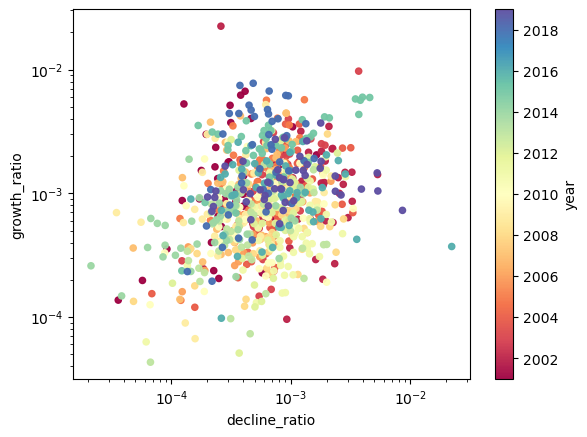

In [4]:
ax = df.plot.scatter('decline_ratio', 'growth_ratio', alpha=0.95, c='year', cmap='Spectral')
ax.set_yscale('log')
ax.set_xscale('log')

In [5]:
df.to_csv('lake_data.csv')

In [6]:
# df.columns = ['lg', 'ld', 'lall']
# df['lg'] = df.lg.astype(float)
# df['ld'] = df.ld.astype(float)
# df['lall'] = df.lall.astype(float)

# df['lg/lall'] = df.lg/df.lall
# df['ld/lall'] = df.ld/df.lall

In [7]:
# df.plot.scatter(x='ld/lall', y='lg/lall')

In [8]:
# df.ld/df.lall